## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the data

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# taking two variables
data = data.drop(["housing_median_age","households","total_bedrooms","longitude","latitude","total_rooms","population","ocean_proximity"], axis=1)
data.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


In [6]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

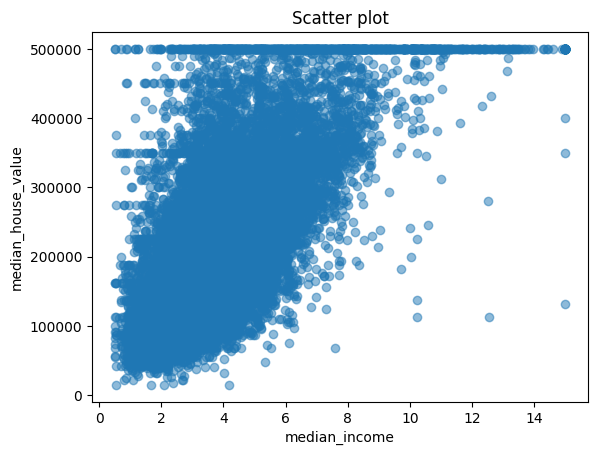

In [7]:
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

Using this scatter plot we can infer that if a person has higher median_income then that person may have more expensive house.
There is somewhat positive linear relationship between them.

## Split the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model 1:

## Linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

In [11]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [42032.17769894]
Intercept: 44320.6352276571
Root mean squared error:  84941.05152406936
R2 score:  0.4466846804895944


**The plot of simple linear regression :**

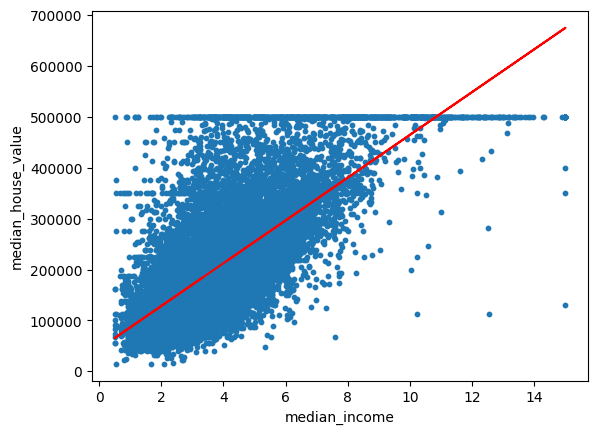

In [12]:
# data points
plt.scatter(X_train, y_train, s=10)
plt.xlabel('median_income')
plt.ylabel('median_house_value')

# predicted values
plt.plot(X_test, y_predicted, color='r')
plt.show()

## Residual plot from linear regression

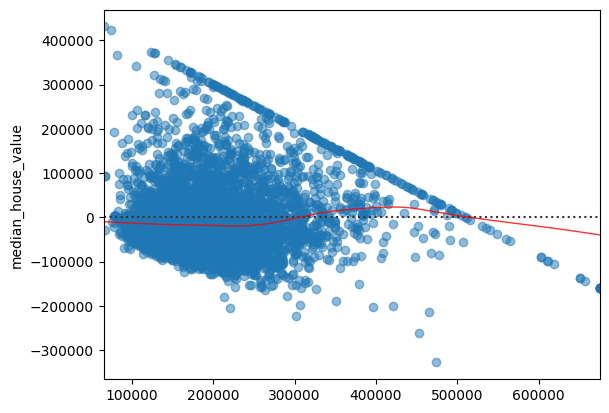

In [13]:
# Assuming y_predicted and y_test are defined and are numpy arrays or similar data structures that support arithmetic operations
residual = y_test - y_predicted

# Corrected call to residplot
sns.residplot(x=y_predicted, y=residual, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()


# Model 2:

## Applying transformation

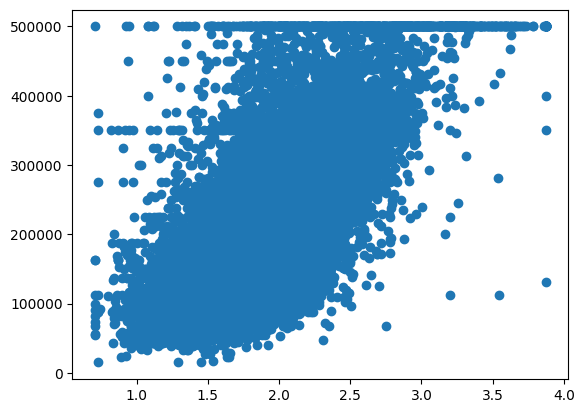

In [14]:
tf = np.sqrt(X_train) 
tf1 = np.sqrt(X_test)

plt.scatter(tf, y_train)
plt.show()

## Fitting a model

In [15]:
regression_model.fit(tf, y_train)
# Predict
y_predicted = regression_model.predict(tf1)

# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [175550.81872626]
Intercept: -129097.46805625176
Root mean squared error:  85566.3672277501
R2 score:  0.4385079432151452


## Residual plot for transformed

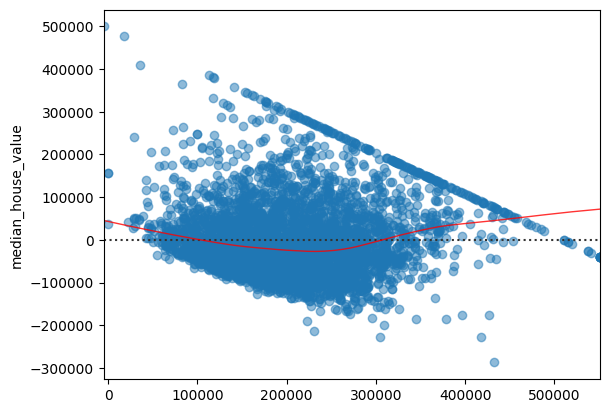

In [16]:
# Assuming y_predicted and y_test are defined and are numpy arrays or similar data structures that support arithmetic operations
residual = y_test - y_predicted

# Corrected call to residplot
sns.residplot(x=y_predicted, y=residual, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()


Residual plot for the transformed linear regression is more zigzag than the simple linear regression.
This residual plot suggest that transformation makes the relationship more non- linear in nature.

# Model 3:

## Fitting polynomial Regression model

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

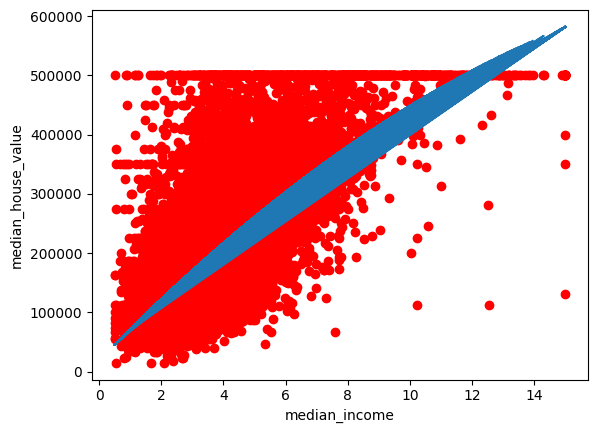

In [18]:
def viz_polymonial():
    plt.scatter(X_train, y_train, color="red")
    plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)))
    plt.xlabel('median_income')
    plt.ylabel('median_house_value')
    plt.show()
    return
viz_polymonial()

In [19]:
# Predict
X_p = poly_reg.fit_transform(X_test)
y_predicted = pol_reg.predict(X_p)

# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [175550.81872626]
Intercept: -129097.46805625176
Root mean squared error:  84699.90676455045
R2 score:  0.44982190770645947


>  **Interpretation**:

This transformed linear regression with single variable (y = mx+b) has 
* Slope of the line(m) : 175550.81
* Intercept (b) : -129097.46
* R2 score:  0.4498 (For R2 score more is better in the range [0,1])

Found R2 score is the best so far. This means that we will keep this ploynomial model with degree 2 as our final and best model(but there is one other thing to consider i.e. simple is better than complex)
* Root mean squared error:  84699.9 (Lower is better)

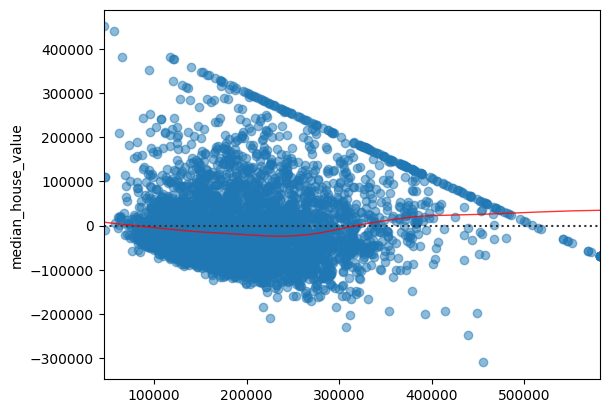

In [20]:
# Assuming y_predicted and y_test are defined and are numpy arrays or similar data structures that support arithmetic operations
residual = y_test - y_predicted

# Corrected call to residplot
sns.residplot(x=y_predicted, y=residual, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()


## Comparing the model

* Model 1 has R2 score:  0.4466
* model 2 has R2 score:  0.4385
* model 3 has R2 score:  0.44982

**After analyzing the R2 score , My final model will be Model 1 as it is simple and has not worse R2 score as compared to the model 3.**